# Лабораторная работая №7
## Применение модели решающих деревьев в задачах классификации
### Гончаров Ян

Задачи к лабораторной работе:
1.	Решить задачу классификации  больных методом логистической регрессии и решающих деревьев используя стандартные настройки моделей. Вывести стандартные метрики. Сделать вывод на основе анализа метрик о том, какая из рассмотренных моделей более подходит для исследуемого датасета.
2.	Исследовать значение выбранной самостоятельно метрики (выбор обосновать) в зависимости от глубины решающего дерева. Построить график зависимости.
3.	Для  модели с оптимальной глубиной полученной в задании 2, отрисовать  получившееся дерево (см. пример далее), важность признаков (feature importances) в виде столбчатой диаграммы, а также PR и ROC кривые


#### Загрузим датасет диабетиков

In [23]:
import pandas as pd

data = pd.read_csv("diabetes.csv")

data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#### Решим задачу классификации, используя логистическую регрессию и решающие деревья

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = data.drop("Outcome", axis = 1)
y = data['Outcome']

clfs = [LogisticRegression(max_iter=1000), DecisionTreeClassifier()]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

for clf in clfs:
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)

    print("\n", clf.__str__())
    print("Accuracy:", accuracy_score(y_test, prediction), "\nPrecision:", precision_score(y_test, prediction), "\nRecall:", recall_score(y_test, prediction), "\nF1:", f1_score(y_test, prediction))



 LogisticRegression(max_iter=1000)
Accuracy: 0.8020833333333334 
Precision: 0.75 
Recall: 0.5806451612903226 
F1: 0.6545454545454547

 DecisionTreeClassifier()
Accuracy: 0.734375 
Precision: 0.5846153846153846 
Recall: 0.6129032258064516 
F1: 0.5984251968503937


По всем метрикам логистическая регрессия выигрывает у дерева со стандартными параметрами

У неё выше доля правильно классифицированных пациентов (Accuracy 0.75 > 0.6875)
Выше отношение правильно классифицированных больных к общему количеству классифицированных больными (Precision 0.69 > 0.56)
Охват правильно классифицированных больных и общему количество больных у двух моделей идентичен (Recall 0.5507 = 0.5507)
Обобщающий параметр F1 так же лучше (F1 0.62 > 0.55)

#### Исследуем значение recall метрики в зависимости от глубины решающего дерева.
Я решил использовать recall, так как нам важно установить как можно больше положительных диагнозов, а ложно положительными можно пренебречь, отправив человека провериться повторно

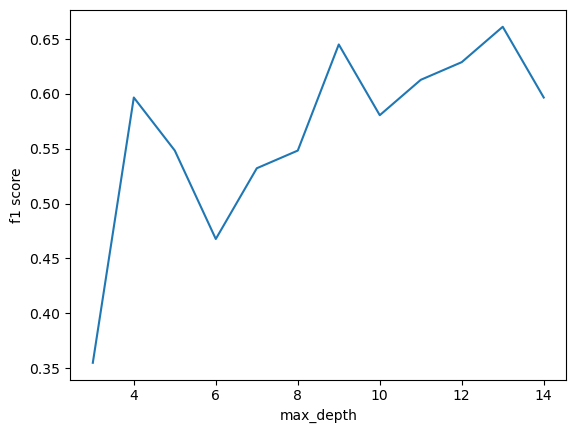

In [25]:
import numpy as np
import matplotlib.pyplot as plt

range = np.arange(3, 15, 1)
recall_arr = []

for i in range:

    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)

    prediction = clf.predict(X_test)

    recall_arr.append(recall_score(y_test, prediction))

plt.plot(range, recall_arr)
plt.xlabel("max_depth")
plt.ylabel("f1 score")
plt.show()

Наилучший показатель recall_score получается при глубине дерева 9.

#### Для  модели с глубиной 9, отрисуем получившееся дерево, важность признаков (feature importances) в виде столбчатой диаграммы, а также PR и ROC кривые

# !
Для работы блока следует раскомментировать код с 13 по 18 строки

При возникновении ошибки
"RuntimeError: Make sure the Graphviz executables are on your system's path"
Следует раскомментировать код с 3 по 6 строку

Данный код добавляет Graphviz в переменную PATH
Скорее всего работает только для Windows
Для корректной работы в 5 строке следует указать путь к папке bin скачанного Graphviz

Скачать его можно здесь: https://graphviz.org/download/
Для других ОС решение проблемы можно найти здесь:
https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

В результате в папке с проектом будет сгенерирован pdf-файл с визуализацией дерева решений

In [26]:
import graphviz
from sklearn import tree
#import os

#path = 'D:/Progr/Stuff/Graphviz/bin/'
#os.environ["PATH"] += os.pathsep + path

features = data.drop("Outcome", axis = 1).columns.values.tolist()

clf = DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)

# dot_data = tree.export_graphviz(clf, out_file=None,
#                                feature_names=features,
#                                filled=True, rounded=True,
#                               special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("decision_tree")


DecisionTreeClassifier(max_depth=9)

#### Оценим важность каждого из признаков

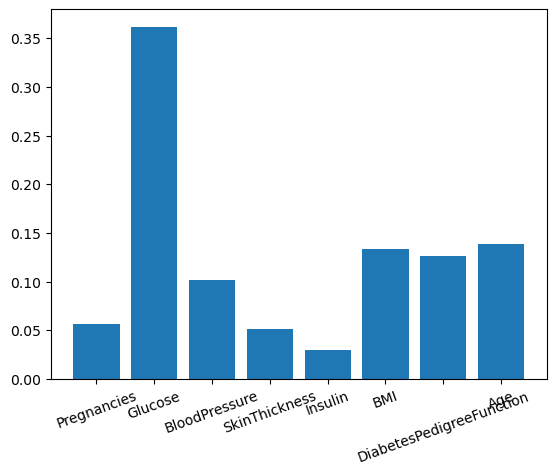

In [27]:
feature_importance = clf.feature_importances_

x = np.arange(0, 8)
y = feature_importance

plt.bar(x, y)
plt.xticks(x, features, rotation=20)

plt.show()


Исходя из гистограммы самым важным фактором является количество глюкозы в крови, после неё с большим отставанием идут возраст и наследственность

#### Изобразим кривые PR и ROC
PR:

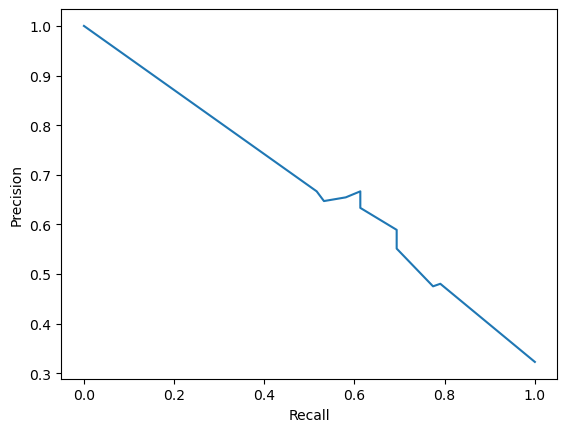

In [32]:
from sklearn.metrics import precision_recall_curve

y_proba = clf.predict_proba(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_proba[:,1])

plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

ROC:

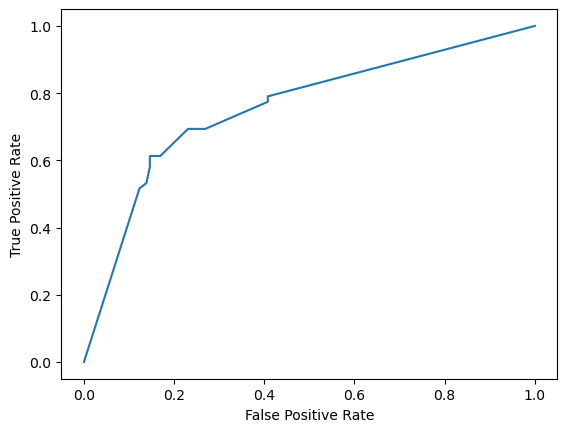

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Из-за того, что дерево не вероятностная модель, то и predict_proba выглядит как список из нулей и единичек. По крайней мере так я успокаиваю себя глядя на эти крайне странные графики.